In [1]:
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
# read in file
file = 'crypto_data.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [25]:
# grab coins that are being traded
df_trade = df.loc[df.IsTrading].reset_index(drop = True)
df_trade.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [26]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [27]:
# drop coins with NA values and ones not being mined
df_drop = df_trade.dropna(how = 'any').reset_index(drop = True)
df_mined = df_drop.loc[df_drop.TotalCoinsMined > 0].reset_index(drop = True)
df_mined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [28]:
# drop Unnamed: 0, CoinName, and IsTrading (all should be since we dropped ones that were not)
df_clean = df_mined.drop(['Unnamed: 0', 'CoinName', 'IsTrading'], axis = 1)
df_clean.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0


In [29]:
# convert TotalCoinSupply to number
df_clean['TotalCoinSupply'] = df_clean.TotalCoinSupply.astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 16.8+ KB


In [30]:
# get unique values from Algorithm column
# get all rows to show
pd.set_option("display.max_rows", None)
df_clean.Algorithm.value_counts()

Scrypt                    182
X11                        73
SHA-256                    48
CryptoNight                19
X13                        17
PoS                        17
Quark                      13
Equihash                   12
NeoScrypt                  10
NIST5                      10
Multiple                    9
Ethash                      9
DPoS                        7
XEVAN                       6
CryptoNight-V7              5
X16R                        4
Lyra2RE                     4
Groestl                     4
X15                         4
SHA-256D                    4
Lyra2REv2                   4
Lyra2Z                      4
Blake                       3
QuBit                       3
POS 3.0                     3
Dagger                      3
SHA-512                     3
CryptoNight Heavy           2
Skein                       2
Keccak                      2
C11                         2
PHI1612                     2
BLAKE256                    2
Blake2b   

In [31]:
# algos = df_clean.Algorithm.value_counts()
# other_algos = []

# for algs in algos:
#     if algs < 5:
#         other_algos.append(algs)

# other_algos

In [32]:
# group Algorithms with less than 5 uses in other
# Prof Booth
algos = df_clean.Algorithm.value_counts()
other_algos = list(algos[algos < 5].index)

df_other_algos = df_clean.copy()

mask = df_other_algos.Algorithm.isin(other_algos)
df_other_algos.loc[mask, "Algorithm"] = "Other"

df_other_algos.Algorithm.value_counts()

Scrypt            182
Other              95
X11                73
SHA-256            48
CryptoNight        19
X13                17
PoS                17
Quark              13
Equihash           12
NeoScrypt          10
NIST5              10
Ethash              9
Multiple            9
DPoS                7
XEVAN               6
CryptoNight-V7      5
Name: Algorithm, dtype: int64

In [34]:
# get list of unique proof types
df_other_algos.ProofType.value_counts()

PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
POBh                      1
LPoS                      1
Proof of Trust            1
Pos                       1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
PoA                       1
PoW + Hive                1
PoW/PoS                   1
PoW and PoS               1
Proof of Authority        1
TPoS                      1
PoW/PoW                   1
dPoW/PoW                  1
PoW/nPoS                  1
PoST                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [39]:
# combine proof types that are the same
df_proof = df_other_algos.copy()

df_proof.loc[df_proof.ProofType == 'Pos', "ProofType"] = "PoS"
df_proof.loc[df_proof.ProofType == 'PoW and PoS', "ProofType"] = "PoW/PoS"
df_proof.loc[df_proof.ProofType == 'PoS/PoW', "ProofType"] = "PoW/PoS"
df_proof.loc[df_proof.ProofType == 'PoW/PoS ', "ProofType"] = "PoW/PoS"
df_proof.loc[df_proof.ProofType == 'PoW/PoW', "ProofType"] = "PoW"

df_proof.ProofType.value_counts()

PoW                     238
PoW/PoS                 180
PoS                      87
DPoS                      9
PoC                       3
PoW + Hive                1
LPoS                      1
Proof of Trust            1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
PoA                       1
Proof of Authority        1
POBh                      1
TPoS                      1
dPoW/PoW                  1
PoW/nPoS                  1
PoST                      1
PoS/PoW/PoT               1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [42]:
# group proof types with less than 9 in 'other'
proofs = df_proof.ProofType.value_counts()
other_proofs = list(proofs[proofs < 9].index)

mask = df_proof.ProofType.isin(other_proofs)
df_proof.loc[mask, "ProofType"] = "Other"

df_proof.ProofType.value_counts()

PoW        238
PoW/PoS    180
PoS         87
Other       18
DPoS         9
Name: ProofType, dtype: int64

In [44]:
# one hot encode columns
oh_cols = ["Algorithm", "ProofType"]
df_oh = df_proof.loc[:, oh_cols]

df_oh = pd.get_dummies(df_oh)
df_oh.head()

,Algorithm_CryptoNight,Algorithm_CryptoNight-V7,Algorithm_DPoS,Algorithm_Equihash,Algorithm_Ethash,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Other,Algorithm_PoS,...,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,Algorithm_XEVAN,ProofType_DPoS,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
# scale numeric columns
num_cols = ["TotalCoinsMined", "TotalCoinSupply"]
df_num = df_proof.loc[:, num_cols]

scaler = StandardScaler()
scaler.fit(df_num)

df_scale = pd.DataFrame(scaler.transform(df_num), columns=num_cols)
df_scale.head()

,TotalCoinsMined,TotalCoinSupply
0,-0.117108,-0.152870
1,-0.093970,-0.145009
2,0.524946,4.489424
3,-0.116715,-0.152560
4,-0.114747,-0.152870


In [49]:
# concat the oh and scaled columns 
df_train = pd.concat([df_scale, df_oh], axis=1)
df_train.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_CryptoNight,Algorithm_CryptoNight-V7,Algorithm_DPoS,Algorithm_Equihash,Algorithm_Ethash,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,...,Algorithm_SHA-256,Algorithm_Scrypt,Algorithm_X11,Algorithm_X13,Algorithm_XEVAN,ProofType_DPoS,ProofType_Other,ProofType_PoS,ProofType_PoW,ProofType_PoW/PoS
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,-0.114747,-0.152870,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


[0.491, 0.115, 0.086, 0.078, 0.059, 0.044, 0.03, 0.017, 0.013, 0.009, 0.008, 0.008, 0.007, 0.006, 0.006, 0.005, 0.005, 0.005, 0.003, 0.003, 0.001, 0.0, 0.0]


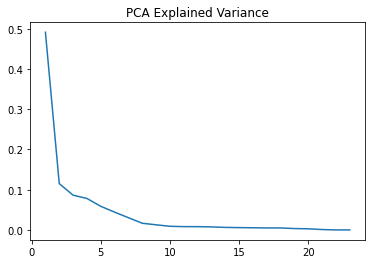

In [52]:
# PCA

# Initialize PCA model
pca = PCA(n_components=len(df_train.columns))
pca.fit(df_train)

# Prof Booth
print([round(x, 3) for x in pca.explained_variance_ratio_])
plt.plot(range(1,len(df_train.columns)+1), pca.explained_variance_ratio_)
plt.title("PCA Explained Variance")
plt.show()

In [73]:
# keep PCA(n_components=0.99)
pca = PCA(n_components=0.99)
pca.fit(df_train)

print([round(x, 3) for x in pca.explained_variance_ratio_])

[0.491, 0.115, 0.086, 0.078, 0.059, 0.044, 0.03, 0.017, 0.013, 0.009, 0.008, 0.008, 0.007, 0.006, 0.006, 0.005, 0.005, 0.005]


In [74]:
# keep 90% of the varience
pca2 = PCA(n_components=0.90)
pca2.fit(df_train)

print([round(x, 3) for x in pca2.explained_variance_ratio_])

[0.491, 0.115, 0.086, 0.078, 0.059, 0.044, 0.03]


In [ ]:
# going from 99 to 90 you drop 11 features losing a total of 16 features

In [76]:
# convert 99% feature set to dataframe
df_pca = pd.DataFrame(pca.transform(df_train))
df_pca.columns = [f"Feature {x}" for x in range(1, len(pca.explained_variance_ratio_)+1)]
df_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18
0,-0.215148,-0.830373,0.271529,-0.599871,-0.049529,0.153521,0.005485,-0.002578,-0.025302,-0.049697,0.017727,0.009726,0.011526,0.018977,-0.015517,0.011425,0.029031,0.008858
1,-0.193260,-0.832700,0.261496,-0.602791,-0.049999,0.152200,0.005747,-0.002236,-0.025833,-0.049956,0.017274,0.010124,0.011128,0.019013,-0.015438,0.011462,0.029081,0.008905
2,3.524971,-0.385961,2.780991,0.953709,-0.197705,0.098144,0.215658,0.373355,-0.039238,0.771746,-0.354452,0.025569,0.135071,-0.092828,-0.086697,-0.027628,-0.045437,-0.024296
3,-0.183738,0.688564,-0.142413,0.095332,-0.234107,-0.274836,0.813789,-0.388323,-0.003404,0.024533,-0.031603,0.024640,0.007116,-0.034808,-0.023549,-0.016960,-0.028419,-0.014087
4,-0.176693,0.683436,-0.124454,0.021774,-0.186487,-0.152729,0.113835,0.311420,0.007798,0.116202,0.152661,0.054854,-0.066191,-0.113493,0.201763,-0.168280,0.347328,0.830676


In [77]:
# convert 90% feature set to dataframe
df_pca2 = pd.DataFrame(pca2.transform(df_train))
df_pca2.columns = [f"Feature {x}" for x in range(1, len(pca2.explained_variance_ratio_)+1)]
df_pca2.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7
0,-0.215148,-0.830373,0.271529,-0.599871,-0.049529,0.153521,0.005485
1,-0.193260,-0.832700,0.261496,-0.602791,-0.049999,0.152200,0.005747
2,3.524971,-0.385961,2.780991,0.953709,-0.197705,0.098144,0.215658
3,-0.183738,0.688564,-0.142413,0.095332,-0.234107,-0.274836,0.813789
4,-0.176693,0.683436,-0.124454,0.021774,-0.186487,-0.152729,0.113835


In [78]:
# TSNE 99%
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_pca)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(532, 2)


,Feature1,Feature2
0,-28.612890,1.810617
1,-34.953064,3.645128
2,3.187526,-6.772277
3,12.665034,-13.349954
4,19.762335,-3.302208


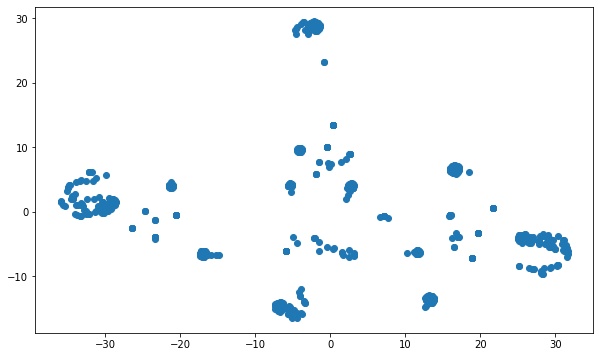

In [79]:
# TSNE plot 99%
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.show()

In [80]:
# TSNE 90%
tsne2 = TSNE(random_state=42)
tsne_features2 = tsne2.fit_transform(df_pca2)
print(tsne_features2.shape)

tsne_df2 = pd.DataFrame(tsne_features2, columns=["Feature1", "Feature2"])
tsne_df2.head()

(532, 2)


,Feature1,Feature2
0,-0.778412,-31.165327
1,-5.448487,-27.084339
2,1.134175,8.589793
3,-24.156202,-8.549816
4,-13.188909,-6.182735


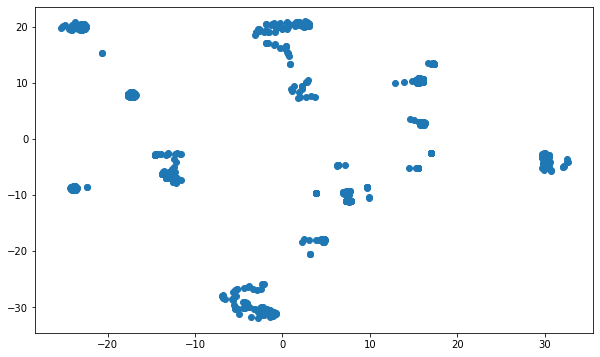

In [81]:
# TSNE plot 90%
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df2["Feature1"], tsne_df2["Feature2"])
plt.show()

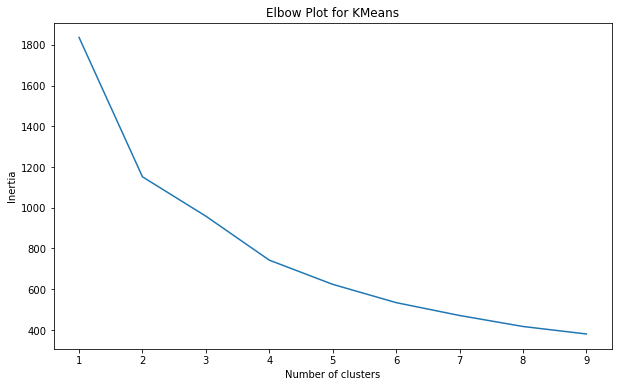

In [87]:
# KMEANS

inertia = []
k = list(range(1, 10))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow)

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()

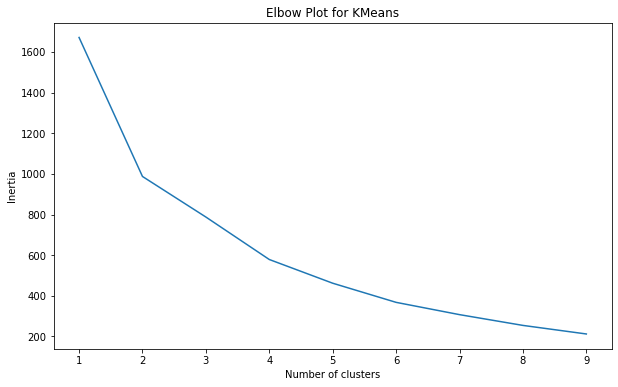

In [88]:
# KMEANS with PCA 90%

inertia = []
k = list(range(1, 10))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_pca2)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow)

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()